In [69]:
import pandas as pd 
import numpy as np
import jieba 
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
from wordcloud import WordCloud  
import chardet 
import jieba.posseg as psg

# 小龙女第一版

In [70]:
with open('F:/大三（下）/文本信息处理与应用/神雕侠侣人名识别与可视化/神雕侠侣-网络版.txt',encoding='utf-8') as f:
    text = f.readlines()

In [71]:
for t in text:
    res = psg.lcut(t)
    jieba.add_word('杨过')  
    jieba.add_word('见')  
    #print([(item.word, item.flag) for item in res])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hp\AppData\Local\Temp\jieba.cache
Loading model cost 1.898 seconds.
Prefix dict has been built successfully.


In [72]:
dict = {}
for t in text:
    res = psg.cut(t)
    for item in res:
        if item.flag == 'nr' and item.word in dict:
            dict[item.word] += 1
        elif item.flag == 'nr' and item.word not in dict:
            dict[item.word] = 1  

In [73]:
name_count = sorted(dict.items(), key=lambda x : x[1], reverse=True)
print(name_count[:30]) 

[('小龙女', 2016), ('李莫愁', 1011), ('郭靖', 999), ('武功', 940), ('黄蓉', 931), ('陆无双', 577), ('周伯通', 573), ('赵志敬', 482), ('郭襄', 404), ('郭芙', 387), ('裘千尺', 325), ('郭', 304), ('耶律齐', 272), ('尹志平', 260), ('欧阳锋', 254), ('黄药师', 244), ('武三通', 240), ('尼摩星', 237), ('公孙止', 235), ('程英', 228), ('武修文', 222), ('朱子柳', 206), ('尹克西', 201), ('武氏兄弟', 191), ('杨过见', 185), ('孙婆婆', 185), ('洪七公', 181), ('明白', 175), ('樊一翁', 167), ('完颜萍', 164)]


In [74]:
data = pd.DataFrame(name_count, columns=['key','value']) 
data = data.drop(data[data['key']=='武功'].index)
data.head() 

,key,value
0,小龙女,2016
1,李莫愁,1011
2,郭靖,999
4,黄蓉,931
5,陆无双,577


In [77]:
dict1 = dict(zip(data['key'],data['value']))

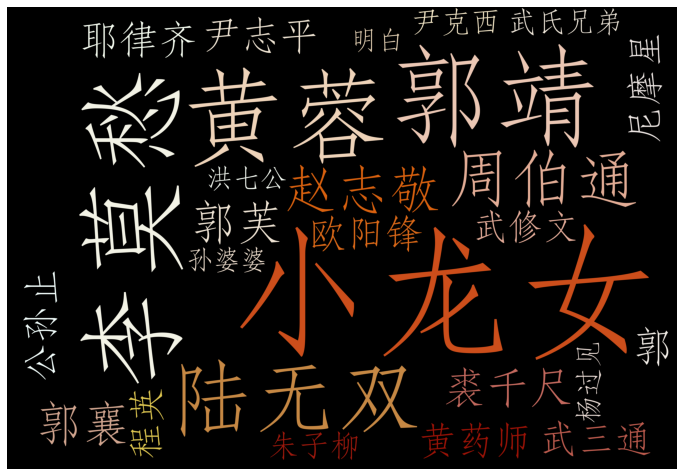

In [133]:
import wordcloud 
from PIL import Image
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from imageio import imread

mask = np.array(Image.open('F:/大三（下）/文本信息处理与应用/文本作业数据/作业数据/射雕背景2.png')) 
wc = wordcloud.WordCloud(
     font_path='C:\Windows\Fonts\STFANGSO.ttf',
     mask=mask, # 设置背景图
     width=1000, height=600, min_font_size=30,
     max_font_size=200, scale=4)

wc.generate_from_frequencies(dict1)
image_colors = wordcloud.ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off') # 关闭坐标轴
plt.show()

# 杨过第一版

In [30]:
txt = open("F:/大三（下）/文本信息处理与应用/神雕侠侣人名识别与可视化/神雕侠侣-网络版.txt","r",encoding="utf-8").read()
words = jieba.lcut(txt)     
counts = {}     

for word in words:
    if len(word) == 1:   
        continue
    else:
        counts[word] = counts.get(word, 0) + 1   

items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)   

for i in range(len(items)):
    word, count = items[i]
    print("{0:<5}{1:>5}".format(word, count))

杨过    5191
小龙女   2020
说道    1450
甚么    1353
自己    1202
李莫愁   1011
一个     991
武功     935
心中     928
郭靖     874
黄蓉     792
一声     738
心想     734
法王     726
不知     699
咱们     697
二人     684
师父     605
蒙古     605
只是     590
陆无双    577
周伯通    573
此时     567
如此     559
当下     555
突然     552
弟子     536
只见     529
知道     510
两人     499
赵志敬    482
不是     472
出来     456
如何     454
之中     442
他们     427
不敢     418
不能     417
今日     417
便是     414
原来     413
功夫     408
眼见     406
却是     404
这时     397
郭襄     394
虽然     392
于是     391
身上     371
金轮法王   370
两个     369
姑姑     363
身子     360
长剑     357
众人     340
伸手     334
脸上     334
当真     332
喝道     331
你们     326
这般     325
裘千尺    325
左手     322
若是     314
性命     308
登时     303
说话     301
跟着     299
怎么     297
问道     297
过去     293
正是     292
兵刃     289
不禁     287
我们     284
之下     284
姑娘     284
过儿     280
当即     277
女儿     276
一招     274
这么     272
霍都     272
耶律齐    272
襄阳     270
不由得    269
少女     267
起来     266
大声     266
之后     265
右手     263

次日      26
我来      26
昨晚      26
那姓      26
仇人      26
化解      26
必定      26
吃惊      26
拳脚      26
幸好      26
身在      26
四字      26
小孩儿     26
这么一来    26
几乎      26
轻身      26
不管      26
无用      26
一年      26
豪杰      26
同去      26
已自      26
身躯      26
自负      26
试试      26
应道      26
淡淡的     26
决无      26
决不会     26
茅屋      26
铁锤      26
窗外      26
坐骑      26
老丐      26
雪地      26
焉能      26
老和尚     26
向法王     26
天竺      26
赵二人     26
王旗      26
大嫂      26
台上      26
当地      25
泪水      25
娃娃      25
两截      25
抓起      25
墙头      25
点穴      25
自尽      25
吓了一跳    25
出家      25
不得不     25
好玩      25
打个      25
长气      25
击落      25
贱人      25
平平      25
大出      25
老头儿     25
数月      25
不顾      25
去势      25
舞动      25
剑锋      25
毒蛇      25
之士      25
郭靖心     25
长啸      25
法门      25
张望      25
领会      25
显然      25
自有      25
北方      25
这一掌     25
姓名      25
深湛      25
乘着      25
自会      25
我妈      25
吃饭      25
此番      25
几日      25
胸中      25
遥遥      25
山上      25
旁边      25
狠辣      25

嘻嘻      14
未能      14
可说是     14
盛怒之下    14
急跃      14
学得      14
深仇      14
来此      14
好教      14
清脆      14
只想      14
大多      14
来得及     14
一刻      14
刀法      14
华山论剑    14
不堪      14
爱怜      14
不去      14
发射      14
罗唆      14
没事      14
故人      14
神智      14
这块      14
那能      14
宛如      14
而前      14
膂力      14
长长的     14
提着      14
好些      14
内劲      14
圆圈      14
身周      14
抛下      14
附近      14
惊骇      14
石头      14
似有      14
下脚      14
正想      14
冷然      14
甚为      14
窗口      14
大进      14
而论      14
加强      14
内脏      14
五指      14
飞扬      14
黄蓉听     14
手来      14
拚个      14
出现      14
有心      14
不离      14
举刀      14
挥手      14
不远      14
不提      14
死去      14
两家      14
叔父      14
根基      14
斥责      14
停住      14
观看      14
大作      14
料来      14
自此      14
不快      14
神往      14
最多      14
言辞      14
大字      14
教人      14
用心      14
脸现      14
惊惶      14
高明      14
抢过      14
拦在      14
地势      14
以免      14
千里      14
敌意      14
怒喝      14
平生      14
何苦      14
何人      14

名目      10
花之毒     10
东首      10
不假      10
第二件     10
公孙止见    10
佛经      10
鄂尔多     10
为国为民    10
下令      10
千人队     10
一干      10
敌营      10
丧命      10
花豹      10
中央      10
一雕      10
反复      10
李道长     10
哪里      10
板壁      10
刘贵妃     10
蓝天      10
坠入      10
陈大方     10
万兽      10
头陀      10
人厨子     10
柔情密意     9
传入       9
须发       9
撇下       9
走入       9
仰起       9
大嚷       9
小脸       9
滚来滚去     9
不痛       9
包扎       9
痛哭       9
现今       9
烟雾       9
似要       9
拔起       9
并肩而立     9
探出       9
插入       9
摘下       9
亲眼见到     9
血手印      9
心狠手辣     9
含泪       9
婢女       9
阿根       9
家里       9
飞跃       9
问话       9
风中       9
射向       9
天井       9
割断       9
粗浅       9
援手       9
哭泣       9
有关       9
辈份       9
一节       9
提了       9
双眉       9
睡到       9
白色       9
孤身一人     9
非常       9
不好意思     9
气急       9
大明       9
平日       9
黑沉沉      9
盗去       9
大增       9
无幸       9
分从       9
插手       9
肤色       9
攻向       9
之首       9
不喜       9
寻访       9
管教       9
一回       9
留着       9

拔去       7
僵持       7
迟钝       7
退避       7
筋骨       7
飞过       7
刀柄       7
应援       7
细微       7
兜圈子      7
一计       7
缺口       7
当儿       7
寻仇       7
这口       7
闷死       7
进房       7
灰白       7
黑气       7
刚硬       7
无聊       7
海边       7
杨铁心      7
之父       7
对得起      7
无敌       7
甚至       7
展翅       7
捉到       7
按捺不住     7
必受       7
抵受       7
峰顶       7
臭小子      7
气愤       7
溪边       7
小鬼       7
挥拳       7
教导       7
奔近       7
绝口不提     7
请来       7
正合       7
拿下       7
书生       7
遍体       7
不练       7
记诵       7
如果       7
争斗       7
晚饭       7
来害       7
生火       7
忍住       7
眼上       7
嘴巴       7
黄河       7
乡下       7
青布       7
上刻       7
四十       7
猛向       7
待人       7
做声       7
白刃       7
反弹       7
路边       7
托大       7
直追       7
制得       7
缚手缚脚     7
一成       7
童心       7
居高临下     7
方便       7
跃落       7
神驰       7
另行       7
一听之下     7
特来       7
有恩       7
拉开       7
迎敌       7
高下       7
落后       7
满山       7
群山       7
妖人       7
相反       7
虽大       7
一伸       7

枣子       6
数十枚      6
皈依       6
九人       6
裘千丈      6
归来       6
怜悯       6
干净       6
明月       6
百脉       6
之遥       6
过门       6
恶行       6
无隙可乘     6
并力       6
悄然       6
其他       6
十八日      6
五大       6
领军       6
不怎么      6
遍地       6
不克       6
众军       6
立此       6
郭芙站      6
奋不顾身     6
善于       6
言中       6
小山       6
奸细       6
一箭       6
下城       6
大鸟       6
花园       6
投缘       6
已向       6
牛筋       6
不告       6
往外       6
回城       6
天下人      6
先父       6
金鞭       6
长声       6
伤到       6
竭尽全力     6
气馁       6
赐予       6
蒙古营      6
活到       6
南北       6
襁褓       6
北门       6
小豹       6
双耳       6
练剑       6
第一件      6
至性       6
赶路       6
进袭       6
左杖       6
把戏       6
鲁莽       6
中放       6
金铃软      6
一卷       6
死有余辜     6
赵真人      6
不足以      6
有利       6
刀割       6
自愿       6
之威       6
山壁       6
深紫色      6
岸上       6
团聚       6
射入       6
加重       6
箱盖       6
丝带       6
师姐       6
店伙       6
倏然       6
着火       6
雪人       6
僧道       6
和慈恩      6
千年       6
心痛       6

见骨       5
仙丹       5
推心置腹     5
危机       5
情义深重     5
连点       5
纵火       5
见三人      5
两轮       5
情境       5
隐蔽       5
针刺       5
黝黑       5
久经       5
打下       5
母豹       5
养驯       5
叩见       5
擅闯       5
埋骨       5
齐名       5
老父       5
善念       5
令郎       5
牵缠       5
深恨       5
问个       5
一中       5
驱除       5
各有所长     5
清白       5
她定       5
压在       5
四十岁      5
交代       5
盗旗       5
重要       5
视作       5
营中       5
引入       5
才识       5
周老爷子     5
不入       5
养蜂       5
蝴蝶       5
蜜香       5
开关       5
铜钟       5
陛下       5
贵官       5
殿来       5
青松       5
挺立       5
出击       5
下腰       5
开山       5
环伺       5
雄浑       5
没多久      5
绝世武功     5
平台       5
剑冢       5
大雨       5
溪底       5
胸襟       5
兰花       5
二十斤      5
传闻       5
一插       5
黄蓉右      5
城郊       5
空袖       5
截断       5
奸徒       5
要挟       5
女娃儿      5
冲开       5
保境安      5
摇摇晃晃     5
驱毒       5
东北       5
歉疚       5
径自       5
摄魂       5
铁链       5
微晃       5
荡开       5
慈恩和尚     5
慈恩大师     5
花坳       5
黄蓉微      5

即过       4
逃避       4
势危       4
这五人      4
掌之力      4
马步       4
通过       4
论剑       4
黄蓉背      4
大限       4
目中       4
年事已高     4
格格直      4
已斗       4
若以       4
山野       4
山药       4
苦恼       4
带风       4
守势       4
倾倒       4
白气       4
辰时       4
未用       4
两败俱伤     4
招招手      4
前任       4
帮之宝      4
推托       4
叹服       4
犹带       4
假死       4
黄土       4
惊世骇俗     4
余裕       4
放眼望去     4
纵目       4
擦擦       4
马腹       4
打尖       4
困顿       4
瞪目       4
山东       4
照实       4
落拓       4
大得多      4
连夜       4
百感交集     4
步行       4
别离       4
之耻       4
诸路       4
毕集       4
丝丝       4
分派       4
正日       4
畅饮       4
心感       4
本色       4
郭靖自      4
师恩       4
记恨       4
现在       4
黄蓉面      4
难报       4
曾以       4
震伤       4
说破       4
怒火冲天     4
猛下       4
装假       4
伎俩       4
必先       4
一攻       4
套子       4
度人       4
拂袖       4
郭芙对      4
对联       4
风景       4
长者       4
太大       4
心不在焉     4
突兀       4
走远       4
味儿       4
怎及       4
生父       4
好男儿      4
大武       4
事不关己     4

生变       3
难上加难     3
收紧       3
构筑       3
看不清      3
头晕目眩     3
呆滞       3
说来说去     3
小阵       3
慈悲为怀     3
齐到       3
黏上       3
戒惧       3
敌阵       3
新创       3
外侧       3
竟以       3
外皮       3
忽想       3
瞧个       3
越紧       3
四十九      3
那料       3
两阵       3
夹缝       3
四十九名     3
鼻肿       3
目青       3
玉清池      3
随机应变     3
甚急       3
方才       3
百余名      3
敌方       3
拳风       3
高得       3
黯然无光     3
盘膝而坐     3
看不见      3
硬手       3
吃大亏      3
再敢       3
郭靖拜      3
堕下       3
贵公子      3
分辩       3
三十招      3
相近       3
硬夺       3
不足挂齿     3
决斗       3
狭路相逢     3
疑窦       3
金纸       3
不浅       3
当可       3
未知       3
危殆       3
教众       3
流泪       3
微皱       3
赵师叔      3
净桶       3
捧起       3
胡扯       3
活生生      3
误入歧途     3
端详       3
较大       3
无意间      3
漆黑一团     3
桥下       3
异书       3
雄姿       3
骇人听闻     3
超逸       3
人杰       3
因缘       3
讲述       3
入侵       3
轰轰烈烈     3
伤亡       3
愤而       3
百般       3
默默无闻     3
人本       3
黄昏       3
寺观       3
便须       3
动心       3
能耐       3

我望       3
求死       3
若断       3
奇门遁甲     3
外感       3
迎头       3
倾囊       3
叉法       3
许多年      3
出屋       3
高见       3
殊不知      3
虽以       3
晚年       3
再娶       3
高出一筹     3
浅薄       3
没上没下     3
一见如故     3
知己       3
变戏法      3
扫兴       3
掩饰       3
无所畏惧     3
终不       3
打坐       3
陈梅曲      3
练气       3
决一死战     3
龙吟       3
自傲       3
交上       3
详尽       3
不念       3
宝贝女儿     3
出嫁       3
新袍       3
怦然心动     3
拍门       3
门板       3
合璧       3
担起       3
心来       3
山前山后     3
设想       3
铁匠铺      3
灭金       3
疆界       3
熏得       3
传译       3
有令       3
效力       3
根子       3
式样       3
此物       3
风箱       3
煤炭       3
红的铁      3
弯成       3
成形       3
未成       3
打好       3
若知       3
皇宫       3
而逝       3
大见       3
画个       3
一偏       3
最小       3
八九分      3
为生       3
走江湖      3
上阵       3
乾脆       3
谦和       3
涌起       3
二三十招     3
一挫       3
初次       3
烧焦       3
羞惭       3
咽下       3
我代       3
远而避      3
所缝       3
骑射       3
英道       3
奸诈       3
人世间      3
四匹       3
哭喊       3

自于       2
清醒       2
牛头不对马嘴    2
这掌       2
歇歇       2
永不分离     2
断成       2
七八十      2
送回       2
曾来       2
屋面       2
看错       2
采到       2
郭靖飞      2
欧阳       2
有极       2
赵钱孙      2
周吴陈      2
姓氏       2
欧阳锋若     2
微屈       2
苦功       2
一遇       2
强似       2
悟出来      2
妙境       2
单以       2
扑面而来     2
不畅       2
猛扑       2
心得       2
并驾齐驱     2
难分上下     2
冬日       2
掌力相      2
力贯       2
黄蓉大惊     2
集于       2
王八       2
双掌力      2
好家伙      2
扬长       2
北行       2
熟睡       2
将明       2
好久       2
随口答应     2
跳来跳去     2
有其父必有其子    2
忙命       2
气定神闲     2
情况       2
过晚       2
甚速       2
老迈       2
半夜里      2
向欧阳锋     2
必至       2
刹时间      2
香炉       2
爬上去      2
偏殿       2
一口钟      2
年久失修     2
击地       2
笃笃       2
仅余       2
运到       2
那铁枪      2
进内       2
重物       2
铁杖挥      2
韩宝驹      2
却接       2
垂下去      2
击得       2
使不出      2
一杖击      2
扑入       2
滚倒       2
坚硬       2
张阿生      2
这刀       2
金断       2
弯过       2
刀刃       2
快手快脚     2
听不出      2
疾扑       2
敲击       2
震耳     

大城       2
废墟       2
血流成河     2
发亮       2
耶律公子     2
志气       2
老一辈      2
没志气      2
掌世       2
克敌       2
找不着      2
怨怒       2
就戮       2
纵得       2
再生       2
君子一言     2
万种       2
大言不惭     2
齐用       2
吹倒       2
死而无怨     2
胆量       2
地矮身      2
打起精神     2
我夺       2
秋波       2
那耶律      2
那股       2
刀来       2
横来       2
玉掌功      2
指点迷津     2
信得过      2
强笑道      2
单刀直入     2
莫不       2
打开门      2
寻个       2
知难而退     2
忽有       2
可须       2
过意       2
一使       2
翻处       2
突转       2
原非易      2
我爹       2
我常       2
原意       2
倾吐       2
伤疤       2
小时       2
动粗       2
难以启齿     2
幌来       2
自下       2
懊丧       2
万端       2
上亲       2
中盗       2
人头       2
出死入生     2
于事无补     2
尊姓       2
彬彬有礼     2
之体       2
须三思      2
交交       2
不忙       2
路途       2
关了       2
称得上      2
不疾不徐     2
跟得       2
堕后       2
乾粮       2
精巧       2
裁剪       2
薄薄的      2
真傻       2
父兄       2
愁闷       2
面条       2
上楼来      2
召唤       2
梯口       2
朱砂       2
不值       2
扩大       2
再作       2
既得       2

迷上       2
这贱       2
那贱       2
调制       2
半颗       2
效验       2
拭去       2
酒宴       2
倘使       2
一百       2
四五丈      2
屏住       2
倾斜       2
壁虎       2
径长       2
但须       2
多时辰      2
索子       2
下望       2
随心       2
几扯       2
钉住       2
千尺       2
垂入       2
拉紧       2
下直       2
收索       2
如飞般      2
收转       2
极猛       2
急坠       2
一尽       2
突被       2
飞将       2
救醒       2
尖角       2
已身       2
那枚       2
欲行       2
务必       2
吓倒       2
别忘了      2
远望       2
混迹       2
怔住       2
太慢       2
一离       2
点起       2
凤冠霞帔     2
齐动       2
安然无恙     2
至亲       2
不响       2
妻舅       2
老朽       2
剩着       2
制止       2
结纳       2
封信       2
猛吃       2
读信       2
获罪       2
放下屠刀     2
三宝       2
之欢       2
多福       2
读完       2
老仆       2
原恕       2
活不活      2
无言以对     2
心眼       2
了解       2
纷扰       2
交拜       2
必以       2
谨严       2
涩滞       2
凶悍       2
远走高飞     2
再遇       2
登止       2
尽行       2
守备       2
受敌       2
敏锐       2
全然不顾     2
我刚       2
反助       2
公孙止右     2
受用不尽     2

兴味       2
没杀       2
再说下去     2
遇雪       2
狼皮       2
獐子       2
愈大       2
翻来翻去     2
离合       2
装机       2
三口       2
胖丐       2
打搅       2
空闲       2
缝中       2
干枯       2
躲起来      2
窗孔       2
远逊       2
四团       2
这白眉      2
自铐       2
那白眉      2
若人罪      2
能悔       2
莫复忧      2
诸恶事      2
令不作      2
生悔       2
知过能改     2
恶根       2
吾师       2
水草       2
命危       2
于晨露      2
汝小早      2
从后       2
及于       2
痛悔       2
雪景       2
虽隔       2
连得       2
震松       2
雪里       2
耐力       2
剃度       2
重压       2
慈恩掌      2
一坐       2
口宣       2
斧钺       2
掌时       2
至理名言     2
僧袍       2
慈恩又      2
慈恩大      2
生恨       2
我佛       2
慈恩听      2
已用       2
慈恩右      2
年代       2
见多识广     2
吓退       2
罪该万死     2
小居士      2
失心       2
慈恩见      2
慈恩叹      2
说得来      2
少受       2
所遇       2
暂不       2
服后       2
明年       2
冬天       2
隐晦       2
洞悉       2
未止       2
水上漂      2
黑点       2
既厚       2
人参       2
之效       2
旷世难      2
奇缘       2
两人时      2
放上       2
模样儿      2
休憩       2
越老越      2

莫瞧       1
造脂       1
扫过去      1
内圈       1
倏起       1
招一阳      1
难闪难      1
金钟       1
忽往       1
舞到       1
欺越       1
震撞       1
黏附       1
数十斤      1
渐处       1
尽丧       1
猛转       1
钓住       1
振翼       1
钢钓铁      1
齐向树      1
养有       1
颇通       1
只痛       1
吱吱       1
急鸣       1
白羽       1
肤似       1
眉目如画     1
小娃       1
力运       1
带树       1
身不由己     1
只雕       1
扑动       1
从雄雕      1
相望       1
左膝       1
几撑       1
和蔼可亲     1
快进去      1
俚曲       1
爱来       1
几摆       1
不直       1
夜长梦多     1
闯向       1
得主       1
左足轻      1
劫二女      1
陆程       1
打个招呼     1
觉胁       1
十岁       1
起心       1
十三四岁     1
心软       1
却射       1
恶鸟       1
两物       1
长空       1
两颗       1
先避       1
先伤       1
后计       1
中系       1
素底       1
姓何       1
没忘       1
先毙       1
银丝击      1
改击       1
钢柄       1
发石       1
江南水乡     1
河泊       1
小河       1
小桥       1
程英只      1
上少       1
挥到       1
妖精       1
混元式      1
木无       1
应以       1
大辱       1
齐向青      1
针针       1
非中       1
桑林       1
十几枚      1

虽能续      1
骨接       1
必较       1
小徒儿      1
咬断       1
杨过泼      1
一醒       1
般纵       1
吃屎       1
手重       1
师伯问      1
满含       1
这逆徒      1
师一徒      1
分班       1
本座       1
散班       1
长生子      1
刘师叔      1
王师叔      1
束手就缚     1
严责       1
力求上进     1
一不小心     1
由掌       1
伯覆查      1
师伯之      1
言全未      1
看顾       1
唯你是问     1
桀骛不驯     1
委决不下     1
练之法      1
几百句      1
师伯们      1
推诿       1
和颜悦色     1
练出       1
外家       1
内者       1
已记       1
忘却       1
非假       1
字字       1
第十天      1
已授       1
祖听       1
头至       1
马钰甚      1
谦冲       1
秋去冬      1
杨过记      1
师师       1
心杯       1
恭顺       1
除夕       1
考查       1
武之期      1
劝练       1
各成       1
谭氏       1
六子       1
宫遇灾      1
险遭       1
颠覆       1
全派       1
岌岌可危     1
首创       1
第二代      1
门徒       1
旷地       1
武论艺      1
由大       1
或演       1
或发       1
或显       1
讲评       1
甲乙       1
最迟       1
专长       1
器械       1
俗家子弟     1
无话可答     1
懒惰       1
修真       1
活计       1
心死       1
今不生      1
精气       1
功行具      1
神京       1

养晦       1
刻上       1
正谋       1
雄心壮志     1
一败       1
讥其       1
预留       1
只望       1
闪入       1
素有       1
讲明       1
妙诀       1
最易       1
师姊才      1
两项       1
默念       1
俯嘴       1
先解       1
太婆       1
遗篇       1
默运       1
罕逢       1
见过世面     1
掌股       1
想且       1
忍一时      1
再治       1
离间       1
带路       1
已板       1
会毙       1
东转       1
西弯       1
山腹       1
渐平       1
湿气       1
渐重       1
淙淙       1
水没至      1
走水       1
自腿       1
胸齐       1
莫喝       1
浸及       1
忽空       1
剑海       1
卸脱       1
股水住      1
甩解       1
用力过度     1
拖拖拉拉     1
一肚子      1
幸差       1
渐缓       1
露口       1
越亮       1
坐困       1
险状       1
不寒而栗     1
下半身      1
行动自如     1
恍同       1
寂无人声     1
繁华世界     1
我得       1
先养       1
便助       1
以蔽       1
风雨       1
居屋       1
前种       1
茉莉       1
香花       1
松叶清      1
花奇卉      1
野草       1
睡眠       1
圆满       1
窒碍       1
入世       1
更无别      1
红尘       1
长羁       1
多明       1
事理       1
雅不欲      1
重经       1
年余       1
精住       1
仅为       1
但此       1

总纪       1
颜若春      1
双蛾       1
自卑       1
无一人      1
马一青      1
一黄       1
良种       1
每匹       1
越战       1
目赤       1
情同       1
纯正       1
骄横       1
政来       1
两胁间      1
彼进       1
此落       1
三人二雕     1
回卷       1
微尘       1
愈离       1
召双雕      1
茫然若失     1
已大起      1
不别       1
还道       1
雄威       1
必含       1
郭芙则      1
恶道       1
四女       1
污言       1
中乱       1
满江湖      1
公敌       1
人离       1
折返       1
野菜       1
破烂不堪     1
发狠       1
半山       1
骤寒       1
铅云       1
低压       1
飘下       1
避雪       1
峨壁       1
中跌       1
谷中张      1
请上来      1
敬爱       1
愁肠       1
千结       1
直震得      1
往下掉      1
顿止       1
恶声       1
却身       1
稳立       1
他时       1
神采奕奕     1
含怨       1
没人怜      1
石室传      1
黄蓉后      1
东飘       1
食谱       1
得其所哉     1
北返       1
那百粤      1
作羹       1
老猫       1
斑鱼       1
似鼠       1
巨虾       1
称龙       1
炒响       1
龙虱       1
蒸禾       1
小猪       1
皮脆       1
肉红       1
如登       1
天界       1
其乐无穷     1
杀恶       1
诛奸       1
来踪去迹     1
消污衣      1
外除       1

逆溯       1
激流       1
师门亲      1
用其所长     1
几斤       1
攻多守少     1
避风       1
兵风难      1
巨声       1
幻为       1
好斗       1
平淡       1
相若之      1
满手是汗     1
弥长       1
狠斗       1
木片       1
整座       1
塌下来      1
黄光黑      1
竟尔断      1
一呼痛      1
投来       1
铁板       1
断桨       1
单桨       1
半斤八两     1
自该       1
向渔隐      1
渔隐道      1
渔隐见      1
一不留神     1
身抢出      1
夺扇       1
跌势       1
跃势       1
十几岁      1
办完       1
几寸       1
掌力含      1
打昏       1
这一绊      1
大疑       1
教棒时      1
查过       1
掌飞脚      1
横桨       1
抽击       1
每一棍      1
落了空      1
铁桨柄      1
你追我赶     1
大嘴       1
横着       1
时使       1
曾受       1
挽回       1
颓势       1
因小       1
而乱       1
大谋       1
连胜       1
起纠纷      1
儿致训      1
抗辩       1
算人话      1
成物       1
驷不及舌     1
反胜为      1
领去       1
配当       1
认老       1
我胜得      1
败定       1
另生       1
再胜得      1
已败       1
要争       1
一昂       1
尚较       1
异花       1
初胎       1
生晕       1
老成       1
挺胸凸肚     1
臀上       1
斜点       1
左掌如      1
扇点       1
却实       1
咋舌       1

锣鼓点      1
一板一眼     1
我离       1
理一理      1
半生行      1
磨枪       1
抱佛脚      1
人动       1
一下一下     1
登现       1
一代宗师     1
冷却       1
送进       1
塞进       1
猛火       1
变红       1
猝然       1
出户       1
似身       1
咬牙齿      1
说时       1
一旁观      1
打过架      1
非激       1
不忠       1
不仁不义     1
淫人       1
妻女       1
出卖       1
散播谣言     1
令名       1
金鸡独立     1
稳又定      1
拐带       1
直压       1
再斗得      1
弓志       1
即懈       1
横锤       1
档开       1
锤头       1
焦臭       1
改使       1
贴近       1
右锤       1
要击       1
不成体统     1
独足       1
肩膊       1
外袍       1
人般       1
穿进       1
拉好       1
过大阵      1
惊羞       1
谢他       1
赠袍       1
邪道       1
凭良心说     1
那纸       1
陈师兄      1
梅师姊      1
死无对证     1
挥划       1
以虎形      1
逆点       1
传不到      1
入情入理     1
出言无状     1
门传       1
心服口服     1
再出       1
积威       1
如释重负     1
因决       1
忘旧       1
跨进       1
旌旗蔽空     1
兵向南      1
铁弓长      1
启行       1
壮观       1
小军舞      1
起长       1
可苦       1
南投       1
以御       1
浩大       1
谁肯       1
深受       1
官小吏      1

迷住       1
足不出户     1
美个       1
甜言蜜语     1
三分三      1
跟班       1
便壶       1
公孙止微     1
反叛       1
混话       1
迷迷       1
法力无边     1
搂搂抱抱     1
丑态       1
差点儿      1
里乐       1
幽会       1
这分       1
丹毁       1
几百枚      1
丹浸       1
要服       1
须连经      1
春露秋霜     1
夫妻之情     1
毁去       1
复起       1
贰心       1
拿主意      1
还入       1
之诚       1
殷殷       1
发下       1
几百个      1
然欲滴      1
改邪归正     1
那颗丹      1
药瞧       1
一干二净     1
这杯       1
转开       1
环顾四周     1
碎石       1
公孙止可     1
更无旁      1
透光       1
来丈       1
虽长       1
二十株      1
叠起       1
上树       1
我若能      1
六七十丈     1
附壁       1
溜回       1
成索       1
横架于      1
横架处      1
吃得住      1
暮色朦胧     1
中关       1
垂了下去     1
蠢货       1
取名为      1
长索来      1
坠下去      1
实做       1
直欲       1
身甫触      1
急跌       1
疾探       1
百来斤      1
几达       1
所扯       1
洞窟       1
中掉       1
越短       1
索垂尽      1
重拉得      1
一拔       1
这一拔      1
无多大      1
几圈       1
倒栽葱      1
历害       1
已殊       1
尖物       1
椎节       1
拉上来      1
告戒       1
拉上       1

悬在       1
下书       1
因人       1
而施       1
光天化日     1
于烛       1
灭星       1
沉之夜      1
会晤       1
跃下庭      1
送呈       1
便进       1
外道       1
危地       1
须防       1
以小人之心    1
舌战       1
藏拙       1
黄蓉挥      1
那通       1
黏劲       1
分娩       1
隆起       1
消折       1
信已       1
城由得      1
茶壶       1
一壶       1
壶嘴       1
中如       1
一条线      1
般射       1
射出来      1
先有       1
警觉       1
爬起来      1
药水       1
惨法       1
突然袭击     1
扑下       1
铁骨       1
已自上      1
猜度       1
溃烂       1
可活       1
都素知      1
药理       1
家传之      1
药茶       1
挨命       1
霍都实      1
门后       1
轻弹       1
他气       1
翻墙       1
以计       1
挫敌       1
绊跌       1
牵得       1
来信       1
致候       1
枉顾       1
得仰       1
秉烛夜谈     1
难屈       1
何老衲      1
承教若      1
言有       1
白头如新     1
倾盖如故     1
思君       1
良深       1
回拜       1
祈勿       1
拒人于千里之外    1
将信       1
虽坚       1
只护       1
致累       1
即用       1
说句话      1
真纯       1
盘套       1
黄蓉摸      1
绝未       1
慰道       1
父之仇      1
两串       1
只服       1
中杀       1
才能救     

得护       1
天多高      1
地多厚      1
千金之躯     1
镇静       1
如恒       1
伸颈       1
一段路      1
三前       1
一后       1
北而行      1
金鼓       1
不择       1
偏僻       1
空屋       1
门窗       1
连晚       1
打磕睡      1
难分高下     1
慢则       1
急召       1
须修持      1
近旁       1
实足       1
四代       1
赶召       1
相随       1
以出       1
同路       1
一片痴心     1
遇仙       1
尤为       1
响箭       1
黄冠道人     1
等候多时     1
道号       1
谦道       1
最长       1
二十多天     1
击罄       1
铁钵       1
法器       1
护拥       1
羡妒       1
五百多名     1
排到       1
肃候       1
颓唐       1
元始       1
天尊       1
太上       1
道君       1
殿全       1
集议       1
七张       1
空椅       1
有客       1
大模大样     1
逃不过      1
硬着头皮     1
官朗声      1
黄缎       1
特授       1
演道       1
玄门掌      1
文粹开      1
玄宏仁      1
广义       1
接旨       1
坐关       1
现由       1
非对       1
玉音       1
所敬       1
须授       1
便荣受      1
忽降       1
侍茶       1
别院       1
此事体大     1
擅自作主     1
日益       1
小视       1
诏书       1
先例       1
未侵       1
此一时彼一时    1
该管       1
宏道       1
忧民       1
血战       

几瓶       1
第一瓶      1
当药服      1
飞进       1
关着       1
闻一闻      1
鼻孔       1
再闻       1
你闻       1
芬香       1
满殿       1
馥郁       1
伤风       1
没好       1
管用       1
挤眉弄眼     1
碰一       1
粘满       1
一举手一     1
几百       1
处玄       1
能愈       1
处玄去      1
平安无事     1
杨小侠      1
九转       1
灵宝       1
拿些       1
枝桠       1
交横       1
荆棘丛生     1
穿林而入     1
如若       1
窃蜜       1
上住       1
掩护       1
小楼       1
依山       1
而建       1
深达       1
溪涧       1
荡过       1
拉直       1
嫁鸡随鸡     1
嫁狗随狗     1
向往       1
却大费      1
后堆       1
铜锁       1
扭断       1
锁扣       1
见箱       1
满箱       1
樟木       1
箱壁       1
铺满       1
天雨       1
屋漏       1
箱内       1
对涧       1
耽心       1
中若       1
走得快      1
郭襄尚      1
墓里       1
瓜地       1
所种       1
南瓜       1
七八天      1
两层       1
他循       1
水道       1
泥石       1
地下隧道     1
晕厥       1
豹乳       1
比常儿      1
便拉着      1
物件       1
难以形容     1
一滴水      1
点落       1
扶椅       1
眷属       1
受全       1
受得住      1
享过       1
搭起       1
积存       1
一坛       1
变坏       1

唯存       1
夺丹       1
公孙止叹     1
只中       1
假毒       1
便作       1
虽舍       1
除此而外     1
杨过驱      1
之愤       1
豺狼虎豹     1
直退       1
相诱       1
凄凄凉凉     1
寒风侵肌     1
骗取       1
往情       1
千百根      1
小刺       1
因无       1
诱引       1
渐大       1
进谷来      1
入情       1
恰恰       1
娘来       1
娘儿俩      1
钳出       1
苦受       1
从情       1
没敢       1
所仗       1
斟酌       1
大疼       1
搜即       1
高伏       1
藏之于      1
僻谷       1
府第       1
不详       1
抬向       1
所到之处     1
藏物       1
于厅       1
予取予携     1
监守       1
善者不来     1
来者不善     1
相率       1
闯谷       1
快求       1
避解       1
齿冷       1
回谷       1
须待       1
不全       1
重忧       1
耿耿       1
须赐赠      1
钉击断      1
三钉       1
泄去       1
解难       1
提不出      1
死敌       1
扫射       1
罢退       1
以望       1
捱苦       1
受难       1
立生       1
铁石心肠     1
初衷       1
拼死       1
脱下来      1
以软       1
猛无伦      1
极小       1
尖啸       1
高叫       1
如言       1
不挡       1
一钉       1
色喜       1
透喉       1
甘爱三钉     1
筹得       1
非此       1
黄蓉拾      1
起剑头      1
一弯臂      1

再输       1
另成       1
历久       1
不愈       1
灵狐是      1
当直       1
林中围      1
成擒       1
林中放      1
灵狐逸      1
巢穴       1
日重       1
中缺       1
担代则      1
施故法      1
狐性       1
多疑       1
一千多只     1
雄鸡       1
烤鸡       1
内全       1
皮筏       1
木排       1
驶入       1
灵狐身      1
小体       1
又速       1
豢养       1
三人常      1
自骑       1
仲是       1
降狮       1
伏虎       1
纵愿       1
舍弟       1
垂怜       1
一扫能      1
姑且       1
一诺千金     1
不打不成相识    1
嫌弃       1
去一趟      1
来宝庄      1
拜候       1
自荐       1
我此       1
急人       1
渐行渐      1
他大袖      1
徐行       1
一岔       1
角上       1
小花       1
虽幼       1
倏去       1
倏回       1
陌生       1
平铺       1
欲击       1
恬淡       1
清高       1
赞扬       1
贪受       1
衷心       1
你素       1
英雄人物     1
语病       1
一个十几岁    1
镇守       1
女英雄      1
认可       1
郭襄待      1
够不上      1
谈不上      1
济急       1
众口       1
称扬       1
撒赖       1
小侄女      1
发窘       1
跳跳蹦蹦     1
抽出来      1
风流倜傥     1
言笑       1
道学先生     1
更守礼      1
纯洁       1
无邪       1
微展       1
家畜       1
雕于       

却施       1
师叔授      1
败此       1
来斗       1
以一围      1
外势       1
挤撞       1
连教       1
拳路       1
连冲       1
抢不出      1
构成       1
已稳       1
逞英雄      1
极爱       1
姑嫂       1
互不相让     1
小叔叔      1
独败       1
归服       1
其母       1
其女       1
更成       1
油嘴       1
呵痒       1
面生       1
混进       1
场来       1
时届       1
未末       1
申初       1
说真的      1
是理       1
两人击      1
武会友      1
魁首       1
独占鳌头     1
倚栏       1
芍药花      1
能求       1
然诺       1
重然诺      1
无论       1
细数       1
困困       1
遭险       1
已故       1
虽爱       1
方正       1
闲情逸致     1
闲云野鹤     1
人非       1
老面子      1
天外       1
邀人来      1
郭芙招      1
没说到      1
一两天      1
全说       1
闲人       1
讲起       1
闯去       1
郭襄争      1
遍邀       1
送礼       1
儿断       1
更恨       1
第十六年     1
专且       1
候小龙      1
积了       1
正会       1
积在       1
而解       1
要遍       1
深锁       1
不管怎样     1
男装       1
双肩       1
短剑       1
鹅卵石      1
铺成       1
花径       1
亭边       1
黄蓉大慰     1
没到       1
会同       1
得保       1
不识大体     1
安泰       1
长寿       1

风动       1
花落       1
智岛南      1
海神       1
终来       1
没时       1
圆脸       1
过完       1
侵体       1
半轮       1
正浓       1
不饮       1
觉唇燥      1
掬水       1
三十六岁     1
方壮盛      1
便白       1
艰苦       1
颠沛       1
鬓际       1
词来       1
如霜       1
苏东坡      1
悼亡       1
之词       1
这首词      1
觉情       1
这词       1
梦到       1
夜来       1
幽梦       1
小轩窗      1
正梳妆      1
相对无言     1
泪千行      1
松岗       1
竟连梦      1
震狮       1
发自肺腑     1
我多活      1
缭绕       1
数百朵      1
寻遍       1
幻出       1
足一登      1
既存       1
收郭       1
襄作       1
衣钵传人     1
问暖嘘      1
掌毙       1
崇仰       1
俨若       1
之尊       1
责他       1
异域       1
每座       1
凄声       1
浪费       1
光阴       1
数十朵      1
大红花      1
低浅       1
魂飞魄丧     1
情深一往     1
倒挂金钩     1
上刚       1
弥合       1
遮盖       1
对山       1
白鬓       1
别出机杼     1
兼东       1
心毒       1
几手       1
三脚猫      1
圈圈       1
环环       1
铁弹       1
暗服       1
要收       1
怅惘       1
硬拼       1
太险       1
掠架开      1
黄蓉吸      1
拳脚交加     1
插回       1
方初逢      1
以拳       1
拳锋       1

击土       1
马已冲      1
挥旗       1
运臂       1
卷发       1
两人八马     1
一杆       1
面火旗      1
两朵       1
火云       1
焦头烂额     1
收集       1
残兵       1
土丘       1
略事       1
终存       1
厌恶       1
难去       1
常觉       1
示惠       1
郭芙才      1
闹别扭      1
眷念       1
固非       1
障在       1
多一些      1
三份       1
揭露       1
齐哥得      1
在乎       1
有夫之妇     1
悠悠的      1
缺少       1
城前       1
附登城      1
阵伍       1
城垣       1
战死沙场     1
归宿       1
再好没有     1
捡拾       1
三五枝      1
马旁       1
紧随其后     1
队冲       1
贯胸       1
惊乱       1
突阵       1
举戟       1
截拦       1
贯甲       1
一十七枝     1
一十七名     1
迅雷不及掩耳    1
屯军       1
余众       1
摧枯拉朽     1
般破       1
坚直入      1
执戟       1
隔断       1
枪急       1
中选       1
龙背       1
鸟颈       1
骨挺       1
筋健       1
嘶吼       1
似雷       1
若风       1
齐注       1
单骑       1
逃遁       1
后蹄       1
流星赶月     1
真切       1
那飞云      1
距大       1
汗背心      1
力尽       1
坠地       1
宋军大      1
呐喊助威     1
尽忠       1
效死       1
赶得上      1
放宽       1
马向西      1
首一个万     1
那万人队     1
大重       

In [38]:
txt = open("F:/大三（下）/文本信息处理与应用/神雕侠侣人名识别与可视化/神雕侠侣-网络版.txt","r",encoding="utf-8").read()
words = psg.cut(txt)     
counts = {}     

for word in words:
    if len(word.word) == 1: 
        continue
    else:
        if word.flag == "nr":    
            counts[word] = counts.get(word, 0) + 1 
items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)    
fi = open("F:/大三（下）/文本信息处理与应用/神雕侠侣人名识别与可视化/人物角色提取.txt","w",encoding="utf-8")
for i in range(len(items)):
    word,pos = items[i][0]
    count = items[i][1]
    a = word + "," + str(count)
    fi.write(a + "\n")
fi.close()

In [2]:
raw=pd.read_table('F:/大三（下）/文本信息处理与应用/神雕侠侣人名识别与可视化/人物角色提取.txt',names=['txt'],encoding='utf-8')
print(len(raw))

3994


In [3]:
raw['人物']=raw['txt'].str.split(',',expand=True)[0]
raw['频率']=raw['txt'].str.split(',',expand=True)[1]
raw=raw.drop('txt',axis=1)
raw = raw.drop(raw[raw['人物']=='武功'].index)
raw[:20]  

,人物,频率
0,杨过,5191
1,小龙女,2020
2,李莫愁,1011
3,郭靖,999
5,黄蓉,931
6,陆无双,577
7,周伯通,573
8,赵志敬,482
9,郭襄,404
10,郭芙,390


In [38]:
x_axis = raw.人物[:20]  
y_axis = raw.频率[:20]  
a=pd.DataFrame(x_axis)
b=pd.DataFrame(y_axis).astype('int') 
c=pd.DataFrame(np.hstack([a,b]) )
c 

,0,1
0,杨过,5191
1,小龙女,2020
2,李莫愁,1011
3,郭靖,999
4,黄蓉,931
5,陆无双,577
6,周伯通,573
7,赵志敬,482
8,郭襄,404
9,郭芙,390


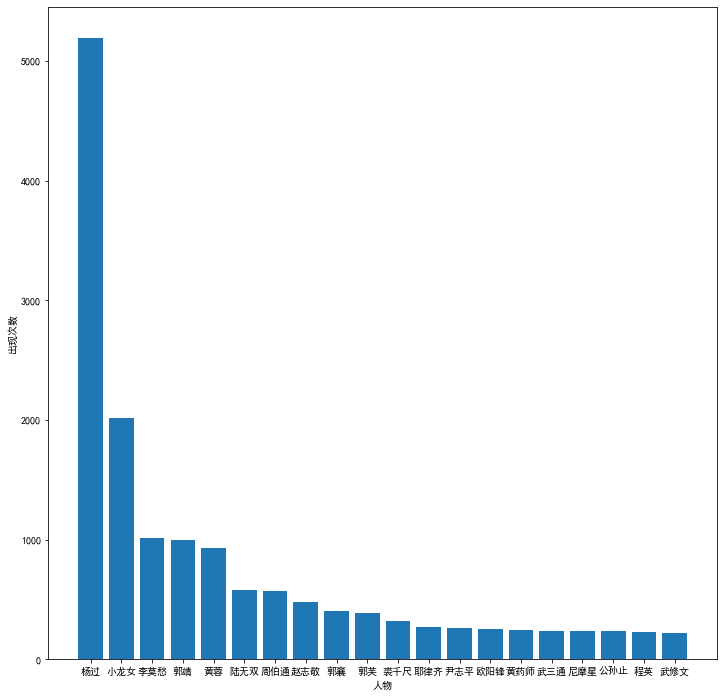

In [45]:
x_axis = list(c[0])
y_axis = list(c[1])
plt.figure(figsize=(12, 12)) 
plt.bar(x_axis,y_axis)  
plt.xlabel("人物")
plt.ylabel("出现次数")
plt.show()

# 人物关系

In [207]:
fi = open('F:/大三（下）/文本信息处理与应用/神雕侠侣人名识别与可视化/神雕侠侣-网络版.txt','r',encoding='utf-8')
fo = open('F:/大三（下）/文本信息处理与应用/神雕侠侣人名识别与可视化/神雕侠侣-人物亲密度.txt','w')
d = {}
names = ['杨过','小龙女','李莫愁','裘千尺','郭靖','黄蓉']
for name1 in names:
    for name2 in names:
        if name1 != name2:
            d[name1 + '-' + name2] = 0


ls = jieba.lcut(fi.read())
for i in range(0,len(ls)-100):
    if ls[i] in names:
        for j in range(1,101):
            if ls[i+j] != ls[i] and ls[i+j] in names:
                d[ls[i] + '-' + ls[i+j]] += 1
                break

ols = []

for k in d:
    ols.append('{:}:{:}'.format(k,d[k]))
#print(','.join(ols))
fo.write(','+ "\n".join(ols))

fi.close()
fo.close()

In [68]:
ra=pd.read_table('F:/大三（下）/文本信息处理与应用/神雕侠侣人名识别与可视化/神雕侠侣-人物亲密度.txt',names=['txt'],encoding='gbk')
ra['人物1']=ra['txt'].str.split('-',expand=True)[0]
ra['中间']=ra['txt'].str.split('-',expand=True)[1]
ra['频率']=ra['中间'].str.split(':',expand=True)[1]
ra['人物2']=ra['txt'].str.split(':',expand=True)[0]
ra['人物2']=ra['中间'].str.split(':',expand=True)[0]
ra=ra.drop('txt',axis=1)
ra=ra.drop('中间',axis=1)
ra = ra[['人物1','人物2','频率']]
ra[:20]  

,人物1,人物2,频率
0,杨过,小龙女,1329
1,杨过,李莫愁,385
2,杨过,裘千尺,141
3,杨过,郭靖,383
4,杨过,黄蓉,240
5,小龙女,杨过,1203
6,小龙女,李莫愁,132
7,小龙女,裘千尺,25
8,小龙女,郭靖,50
9,小龙女,黄蓉,67
